In [1]:
import os
import sys
import tensorflow as tf
import keras
import argparse
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
from keras.utils import plot_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from dtdn.layers import models
from dtdn.config import cur_config as config
from dtdn.utils import file_utils, image_utils, np_utils, visualize
from dtdn.utils.generator import generator
from dtdn.preprocess import reader
from dtdn.utils.detector import TextDetector

Using TensorFlow backend.


In [0]:
config.USE_SIDE_REFINE = True
config.IMAGES_PER_GPU = 1
config.IMAGE_SHAPE = (1024, 1024, 3)

In [0]:
# test_image_paths = glob('./test_images/*')
image, image_meta, _, _ = image_utils.load_image_gt(
    np.random.randint(10),
    './test.jpg',
    config.IMAGE_SHAPE[0],
    None
)

In [4]:
model = models.ctpn_net(config, 'test')
model.load_weights('./dtdn_model_weights_050.h5', by_name = True)








feature_shape:Tensor("gen_ctpn_anchors/Shape:0", shape=(4,), dtype=int32)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/content/dtdn/layers/text_proposals.py:63: DeprecationWarning: Call to deprecated function (or staticmethod) batch_slice. (It is recommended to use native tf.map_fn; it is more efficient and does not need to display the incoming batch_size parameter.)
  self.batch_size)
/content/dtdn/layers/text_proposals.py:68: DeprecationWarning: Call to deprecated function (or staticmethod) batch_slice. (It is recommended to use native tf.map_fn; it is more efficient and does not need to display the incoming batch_size parameter.)
  self.batch_size)
/content/dtdn/layers/text_proposals.py:74: DeprecationWarning: Call to deprecated function (or staticmethod) batch_slice. (It is recommended to use native tf.map_fn; it is more efficient and does not need to display the incoming batch_size parameter.)
  self.batch_size)


In [0]:
text_boxes, text_scores, _ = model.predict([np.array([image]), np.array([image_meta])])
text_boxes = np_utils.remove_pad(text_boxes[0])
text_scores = np_utils.remove_pad(text_scores[0])[:, 0]

In [0]:
image_meta = image_utils.parse_image_meta(image_meta)
detector = TextDetector(config)
text_lines = detector.detect(text_boxes, text_scores, config.IMAGE_SHAPE, image_meta['window'])

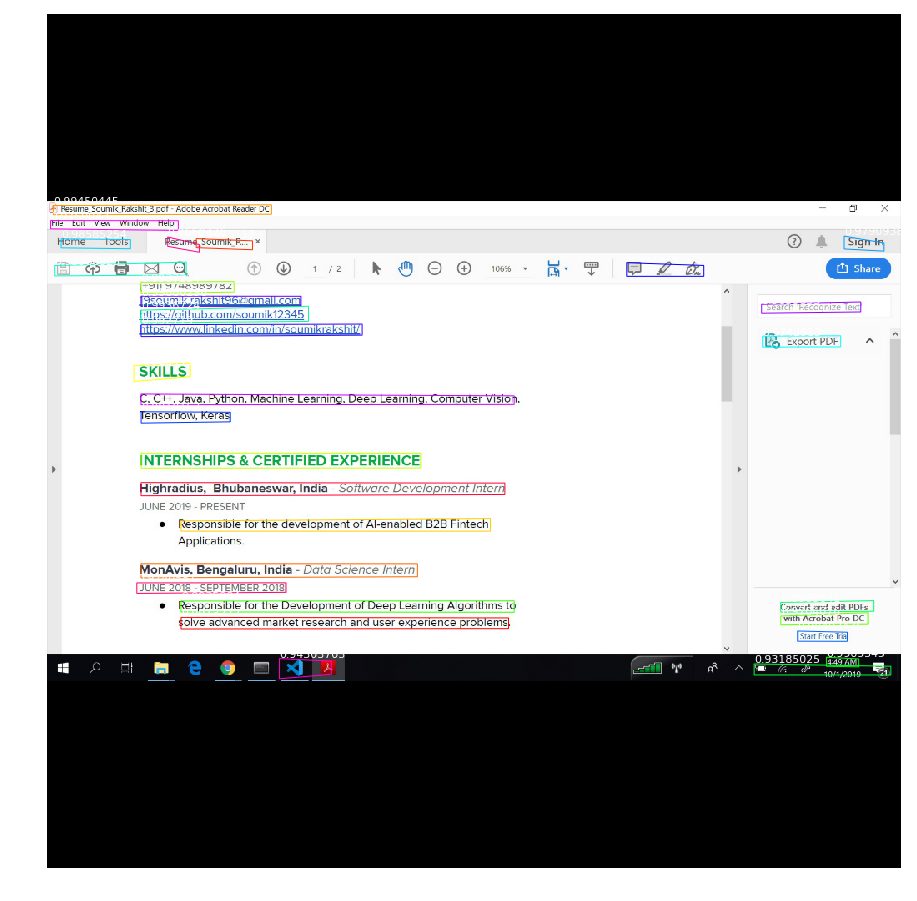

In [7]:
boxes_num = 30
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(1, 1, 1)
visualize.display_polygons(image, text_lines[:boxes_num, :8], text_lines[:boxes_num, 8],
                            ax=ax)
image_name = os.path.basename('fig1.jpg')
fig.savefig('{}.{}.jpg'.format(os.path.splitext(image_name)[0], int(config.USE_SIDE_REFINE)))